In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
sns.set(style='white')

# Select the disease you want to find compounds for
DISEASE = 'DOID:1612'
DISEASE_NAME = "breast_cancer"
%matplotlib inline


In [2]:
# Load dataframes 
compound_info_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/spoke_compound_info.tsv', sep='\t', header=0, index_col=False)
query_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/query_table.tsv', sep='\t', header=0, index_col=False)
path_count_and_dwpc_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_path_table.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False)
compound_category_and_trial_count_df = pd.read_csv('https://raw.githubusercontent.com/baranzini-lab/PSPG_245B/master/%s_known_relationships.tsv'%DISEASE_NAME, sep='\t', header=0, index_col=False).fillna('NULL')


In [3]:
compound_info_df.head()

,Compound,Name
0,DB01148,Flavoxate
1,DB01359,Penbutolol
2,DB00246,Ziprasidone
3,DB04878,Voglibose
4,DB06589,Pazopanib


In [4]:
path_count_and_dwpc_df.head()

,Compound,Meta_Path,Path_Count,DWPC
0,DB01148,CbGaD,1.0,0.006470
1,DB01148,CdGuD,0.0,0.000000
2,DB01148,CrCtD,1.0,0.062018
3,DB01148,CtDrD,0.0,0.000000
4,DB01148,CuGdD,0.0,0.000000


In [5]:
compound_category_and_trial_count_df.head()

,Compound,Name,Cat,Trials
0,DB00322,Floxuridine,NULL,3.0
1,DB06151,Acetylcysteine,NULL,1.0
2,DB00208,Ticlopidine,NULL,1.0
3,DB00264,Metoprolol,NULL,2.0
4,DB00302,Tranexamic Acid,NULL,1.0


In [6]:
query_df.head()

,Abbrev.,Metapath,meta_query
0,CbGaD,(c:Compound)-[:BINDS_CbG]-(:Gene)-[:ASSOCIATES...,(n0:Compound)-[:BINDS_CbG]-(n%s)-[:ASSOCIATES_...
1,CdGuD,(c:Compound)-[:DOWNREGULATES_CdG]-(:Gene)-[:UP...,(n0:Compound)-[:DOWNREGULATES_CdG]-(n%s)-[:UPR...
2,CrCtD,(c:Compound)-[:RESEMBLES_CrC]-(:Compound)-[:TR...,(n0:Compound)-[:RESEMBLES_CrC]-(n%s)-[:TREATS_...
3,CtDrD,(c:Compound)-[:TREATS_CtD]-(:Disease)-[:RESEMB...,(n0:Compound)-[:TREATS_CtD]-(n%s)-[:RESEMBLES_...
4,CuGdD,(c:Compound)-[:UPREGULATES_CuG]-(:Gene)-[:DOWN...,(n0:Compound)-[:UPREGULATES_CuG]-(n%s)-[:DOWNR...


In [7]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are path counts



Meta_Path,Compound,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
0,DB00014,0.0,0.0,9.0,1.0,69.0,1901.0,0.0,2103.0,0.0,...,0.0,0.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0
1,DB00035,2.0,0.0,28.0,4.0,682.0,18231.0,0.0,1494.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB00050,0.0,2.0,9.0,1.0,69.0,1901.0,0.0,308.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB00091,6.0,103.0,174.0,39.0,8575.0,31591.0,0.0,2491.0,976.0,...,0.0,0.0,14.0,24.0,0.0,0.0,0.0,115.0,0.0,300.0
4,DB00093,0.0,0.0,2.0,0.0,72.0,4024.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# use pandas pivot table to make a dataframe where rows are compounds, 
# columns are the meta paths, and values are DWPC


Meta_Path,Compound,CbGaD,CbGbCtD,CbGeAlD,CbGiGaD,CbGiGiGaD,CbGpBPpGaD,CbGpPWpGaD,CcSEcCtD,CdGdCtD,...,CtDdGdD,CtDdGuD,CtDlAlD,CtDpSpD,CtDrD,CtDuGdD,CtDuGuD,CuGdCtD,CuGdD,CuGuCtD
0,DB00014,0.000000,0.000000,0.009591,0.016620,0.002327,0.015709,0.0,0.065705,0.000000,...,0.0,0.0,0.005568,0.020882,0.0,0.0,0.0,0.000000,0.0,0.008806
1,DB00035,0.004930,0.000000,0.001881,0.001861,0.006509,0.029796,0.0,0.038118,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,DB00050,0.000000,0.092005,0.009591,0.016620,0.002327,0.015709,0.0,0.016436,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
3,DB00091,0.011975,0.031530,0.013300,0.011212,0.029741,0.055068,0.0,0.066656,0.160055,...,0.0,0.0,0.024148,0.020831,0.0,0.0,0.0,0.033873,0.0,0.054311
4,DB00093,0.000000,0.000000,0.000962,0.000000,0.002650,0.017717,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000


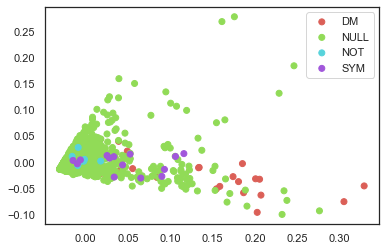

In [9]:
# write a function to plot the PCA using path count, DWPC, or both
# allow coloring by drug status or trial count (see compound_category_and_trial_count_df)
pca = PCA(n_components=2)


In [10]:
# Find the explained variance


PC1: 0.43 PC2: 0.16


In [11]:
# Find the components for each meta-paths (note: here we are using the abs of the components)


,PC1,PC2
CdGdCtD,0.558323,0.252973
CuGuCtD,0.519969,0.214244
CcSEcCtD,0.269357,0.044206
CbGpBPpGaD,0.259057,0.765535
CbGbCtD,0.222147,0.053730


Top Compounds


,Compound,Meta_Path,Path_Count,DWPC,Name,Cat,Trials
1380,DB00997,CcSEcCtD,3433.0,0.117295,Doxorubicin,DM,295.0
254,DB00445,CcSEcCtD,3433.0,0.115843,Epirubicin,DM,173.0
330,DB01248,CcSEcCtD,2552.0,0.101760,Docetaxel,DM,376.0
548,DB00188,CcSEcCtD,3266.0,0.092056,Bortezomib,NULL,0.0
166,DB01229,CcSEcCtD,2973.0,0.089168,Paclitaxel,DM,592.0


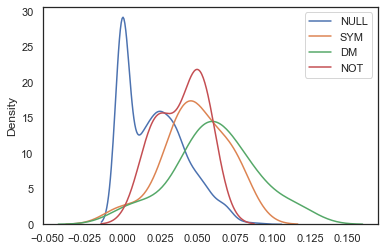

In [12]:
# Look at the distributions of different meta paths.
# Do the disease-modifying comp separate from the rest?


In [13]:
# After you find meta-paths with good separation, look at the top hits in Neo4j
# Write a function to create a Cyper query that will show you the meta paths between the disease and compound
get_cyper_query(query_df, compound = 'DB00188', meta_path='CcSEcCtD')

MATCH path=(c:Compound)-[:CAUSES_CcSE]-(:SideEffect)-[:CAUSES_CcSE]-(:Compound)-[:TREATS_CtD]-(d:Disease) WHERE c.identifier="DB00188" AND d.identifier="DOID:1612" RETURN path LIMIT 5


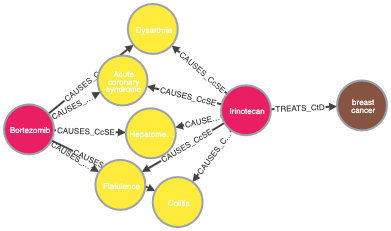

In [14]:
from IPython.display import Image
from IPython.core.display import HTML 
# This is the output of the above query in Neo4j
Image("breast_cancer_example_output.png")

In [15]:
# Once you have a good Disease-Compound pair..
# check how it did & look at top 10 paths 
compound = 'DB00188'
print('https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/%s/%s.html' % (compound, '_'.join(DISEASE.split(':'))))

https://neo4j.het.io/browser/?cmd=play&arg=https://neo4j.het.io/guides/rep/DB00188/DOID_1612.html


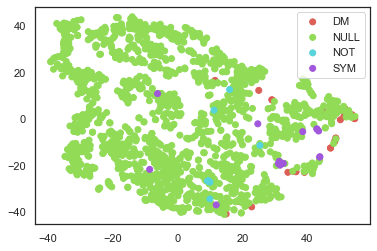

In [16]:
# Plot the results using TSNE
tsne = TSNE(n_components=2)
